In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install tensorflow-gpu keras tensorflow-hub

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 450kB 50.0MB/s 
     |████████████████████████████████| 3.9MB 41.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=40ac928048535e1624f77bc851b519a0ea6735eb4e9ae28ee6cea90a1f21ddaa
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2

In [5]:
cd /content/drive/My\ Drive/Clothes-Classification

/content/drive/My Drive/Clothes-Classification


In [3]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import matplotlib.style as style
from datetime import datetime
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from tensorflow.keras import layers
from time import time
import os
import pandas
import shutil
import numpy as np
print("TF version:", tf.__version__)

TF version: 2.1.0


In [51]:
classes = os.listdir('data')
operation = ['train', 'test']
print(classes)

['trousers', 'skirt', 'train', 'test']


In [0]:
if not os.path.exists(os.path.join('data', 'train')):
  os.mkdir(os.path.join('data', 'train'))
  os.mkdir(os.path.join('data', 'test'))

In [0]:
for id in classes:
  for op in operation:
    if not os.path.exists(os.path.join('data', op, id)):
      os.mkdir(os.path.join('data', op, id))

In [0]:
train_dest = os.path.join('data', 'train')
test_dest = os.path.join('data', 'test')
# for label in classes:
#   origin = os.path.join('data', label)
#   data = os.listdir(origin)
#   train = data[:int(np.ceil(0.8*len(data)))]
#   test =  data[int(np.ceil(0.8*len(data))):]
#   for images in train:
#     shutil.move(os.path.join(origin, images), os.path.join(train_dest, label,  images))
#   for images in test:
#     shutil.move(os.path.join(origin, images), os.path.join(test_dest, label,  images))


In [11]:
pixels = 224
FV_SIZE = 1280
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 16
classes = ['skirt', 'trousers']
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                  input_shape=IMAGE_SIZE+(3,),
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(len(classes), activation='softmax')
])                                   
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 2,914,882
Trainable params: 656,898
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_dest, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_dest, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 315 images belonging to 2 classes.
Found 1265 images belonging to 2 classes.


In [0]:
LEARNING_RATE = 0.001
model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [20]:
EPOCHS=3
STEPS_EPOCHS = train_generator.samples//train_generator.batch_size
VALID_STEPS=validation_generator.samples//validation_generator.batch_size
history = model.fit( 
          train_generator,
          steps_per_epoch=STEPS_EPOCHS,
          epochs=EPOCHS,
          validation_data=validation_generator,
          validation_steps=VALID_STEPS)

  ...
    to  
  ['...']


  ...
    to  
  ['...']
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 79 steps, validate for 19 steps
Epoch 1/3
78/79 [============================>.] - ETA: 0s - loss: 0.3072 - accuracy: 0.8613

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


79/79 [==============================] - 18s 234ms/step - loss: 0.3042 - accuracy: 0.8631 - val_loss: 0.0839 - val_accuracy: 0.9671
Epoch 2/3
79/79 [==============================] - 17s 212ms/step - loss: 0.1388 - accuracy: 0.9488 - val_loss: 0.0760 - val_accuracy: 0.9671
Epoch 3/3
79/79 [==============================] - 16s 206ms/step - loss: 0.1114 - accuracy: 0.9608 - val_loss: 0.0742 - val_accuracy: 0.9770


In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
tf.keras.models.save_model( model, 'model.h5')

SOURCE: class: trousers, file: trousers/images362.jpg
SOURCE: class: skirt, file: skirt/Screenshot-893.jpg
SOURCE: class: skirt, file: skirt/s-110044732royal-blue-trishaa-by-pantaloons-original-imafdbjfrzurvzzf0.jpeg
SOURCE: class: skirt, file: skirt/images62.jpg
SOURCE: class: trousers, file: trousers/images91.jpg
[[0.9930627  0.00693733]]
[0.9930627  0.00693733]
PREDICTED: class: skirt, confidence: 0.993063


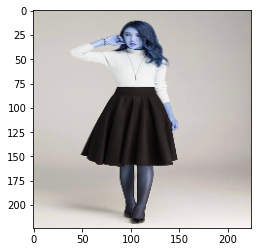

<Figure size 432x288 with 0 Axes>

In [30]:
import itertools
import random
from collections import Counter
from glob import iglob
import cv2
classes = ['skirt', 'trousers']
def load_image(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255
    
    return img
def predict(image):
    print(model.predict(np.asarray([img])))
    probabilities = model.predict(np.asarray([img]))[0]
    print(probabilities)
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    pass
    
img = load_image('woman.jpg')
prediction = predict(img)
print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
plt.imshow(img)
plt.figure(idx)    
plt.show()

In [29]:
ls

'Copy of model.ipynb'   model.h5     pants_linen.png
 data/                  model.json   woman.jpg
